<a href="https://colab.research.google.com/github/rore2000/MOF-project/blob/main/RoaaAlnader_MOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roaa Alnader - MOF Exercise**


---



In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/expense_data.csv")

In [ ]:
#to see the first rows in Data
data.head()

,"Expense Code,Month,Expense Quantity,Government Entity",Unnamed: 1
0,"10003,42948,1530,Ministry of Education",NaN
1,"10003,42979,3060,Ministry of Education",NaN
2,"10007,42917,1792,Ministry of Health",NaN
3,"10007,42979,2048,Ministry of Health",NaN
4,"10007,43132,1024,Ministry of Health",NaN


In [ ]:
len(data.columns)

2

In [ ]:
data.columns[0]

'Expense Code,Month,Expense Quantity,Government Entity'

In [ ]:
data.columns[1]

'Unnamed: 1'

# **Q1 - Issues**




1. the rows in csv file between double quotation ---> need to remove the quotation because dataframe recognize it as text (one column), after removing the quotation, dataframe can recognize the columns

2. csv file has additional empty column

In [ ]:
import csv
import pandas as pd
file_path = "/content/expense_data.csv"

#Read the file and remove quations
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data = [row[0].strip('"').split(',') for row in reader] #remove quations and split entire row to columns



In [ ]:
#Convert to DataFrame
df = pd.DataFrame(data, columns=['Expense Code', 'Month', 'Expense Quantity', 'Government Entity'])
df.head()

,Expense Code,Month,Expense Quantity,Government Entity
0,Expense Code,Month,Expense Quantity,Government Entity
1,10003,42948,1530,Ministry of Education
2,10003,42979,3060,Ministry of Education
3,10007,42917,1792,Ministry of Health
4,10007,42979,2048,Ministry of Health


In [ ]:
df.describe()

,Expense Code,Month,Expense Quantity,Government Entity
count,17086,17086,17086,17086
unique,3788,17,4391,5
top,12565,42887,120,Ministry of Energy
freq,56,1445,115,7089


In [ ]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 17086


In [ ]:
# Get the number of NaN values for each column
nan_counts = df.isna().sum()
print(nan_counts)

Expense Code         0
Month                0
Expense Quantity     0
Government Entity    0
dtype: int64


In [ ]:
# Drop the first row because it contains duplicate headers
df = df.drop(0)
# Reset index to clean up the DataFrame
df = df.reset_index(drop=True)

In [ ]:
df.head()

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,42948,1530,Ministry of Education
1,10003,42979,3060,Ministry of Education
2,10007,42917,1792,Ministry of Health
3,10007,42979,2048,Ministry of Health
4,10007,43132,1024,Ministry of Health


In [ ]:
df.dtypes

Expense Code         object
Month                object
Expense Quantity     object
Government Entity    object
dtype: object

# **Q1- continue**

1. I handled the issue by removing the quotations and split the rows to 4 columns -> **(Data Transformation)**

2. Month has random values should be handled by -> convert Excel serial dates

In [ ]:
import xlrd
#convert random number in month to date type
#Excel stores dates in a very odd way: a serial number of days since 1900.
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Month'] = pd.to_datetime(df['Month'], origin='1899-12-30', unit='D')
#convert data types
df["Expense Code"] = df['Expense Code'].astype(str)
df['Expense Quantity'] = pd.to_numeric(df['Expense Quantity'], errors='coerce')
df["Government Entity"] = df['Government Entity'].astype(str)


In [ ]:
#Check data types again
df.dtypes

Expense Code                 object
Month                datetime64[ns]
Expense Quantity            float64
Government Entity            object
dtype: object

In [ ]:
df.head()

,Expense Code,Month,Expense Quantity,Government Entity
0,10003,2017-08-01,1530.0,Ministry of Education
1,10003,2017-09-01,3060.0,Ministry of Education
2,10007,2017-07-01,1792.0,Ministry of Health
3,10007,2017-09-01,2048.0,Ministry of Health
4,10007,2018-02-01,1024.0,Ministry of Health


# **Q2- Time Series Analysis**

In [ ]:
#for i in df['Month']:
  #print(i)

In [ ]:
#(1) Sort the dates
df = df.sort_values(by='Month')
#(2) Filter data for year 2017
df_2017 = df[df['Month'].dt.year == 2017]

In [ ]:
#for month in df_2017['Month']:
    #print(month)

<ipython-input-21-d01ec20d35d4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  plot = sns.lineplot(data=df_2017, x='Month', y='Expense Quantity', ci=None )


Text(0.5, 1.0, 'the expense quantity trend')

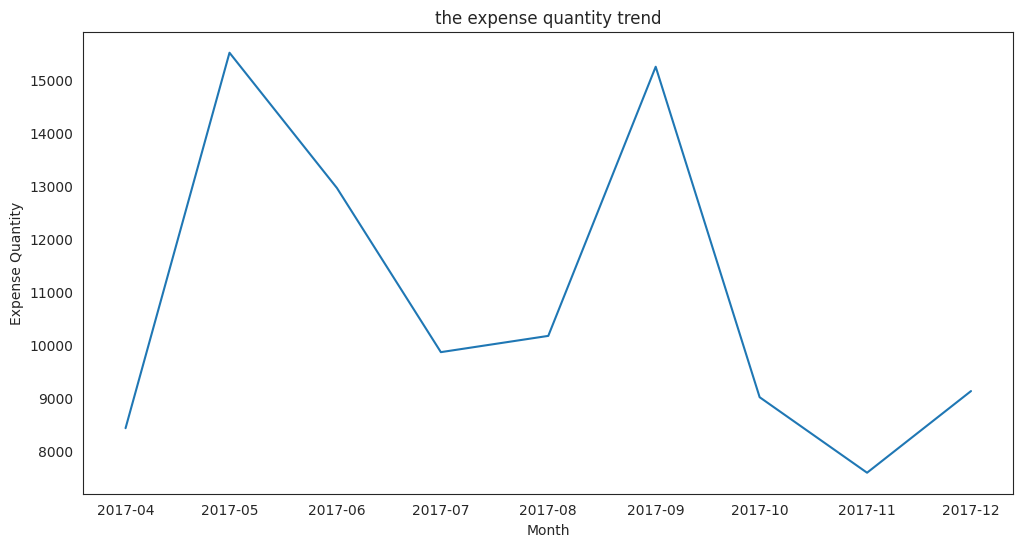

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#(3) Plot
sns.set_style("white")
plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=df_2017, x='Month', y='Expense Quantity', ci=None )
plot.figure.set_facecolor('white')
plot.set_facecolor('white')

plt.xlabel('Month')
plt.ylabel('Expense Quantity')
plt.title('the expense quantity trend')


# **Q3 - Government Spending Analysis**

- How much has been spent in terms of value by government entities

I printed the Expense Quantity for each Entity from larger quantitiy number to lower

In [ ]:
entities = df.groupby(['Government Entity'])['Expense Quantity'].sum()
expense_sum_sorted = entities.sort_values(ascending=False)
entities
#for name, i in entities:
    #print(f"{name}")

Government Entity
Ministry of Education     30608868.0
Ministry of Energy       110541019.0
Ministry of Health        40296284.0
Ministry of Housing        9401137.0
Name: Expense Quantity, dtype: float64

# **Q4 - Data Integration and Demand Analysis**

- Inner join

- Analysis the relationship between Expense Quantity and Expense Amount

- Adding new measure (Cost) and find the correlation


- Calculate Cost, cost = Expense Quantity *Expense Amount (SAR)


In [ ]:
import csv
import pandas as pd
file_path = "/content/expense_amount_data.csv"

#Read the file and remove quations
with open(file_path, 'r') as file:
    reader = csv.reader(file)
    data = [row[0].strip('"').split(',') for row in reader] #remove quations and split entire row to columns


In [ ]:
#Convert to DataFrame
df2 = pd.DataFrame(data, columns=['Expense Code', 'Expense Amount (SAR)'])
# Drop the first row because it contains duplicate headers
df2 = df2.drop(0)
# Reset index to clean up the DataFrame
df2 = df2.reset_index(drop=True)
df2["Expense Code"] = df2['Expense Code'].astype(str)
df2['Expense Amount (SAR)'] = pd.to_numeric(df2['Expense Amount (SAR)'], errors='coerce')
df2.head()

,Expense Code,Expense Amount (SAR)
0,10532,4.46
1,10640,6.84
2,11053,0.36
3,11291,2.47
4,11436,1.70


In [ ]:
df2.dtypes

Expense Code             object
Expense Amount (SAR)    float64
dtype: object

In [ ]:
merged_df = pd.merge(df, df2, on='Expense Code', how='inner')


In [ ]:
merged_df.head()

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR)
0,4813,2017-04-01,4728.0,Ministry of Health,2.18
1,4813,2017-05-01,3546.0,Ministry of Health,2.18
2,4813,2017-12-01,1379.0,Ministry of Health,2.18
3,4813,2018-04-01,1182.0,Ministry of Health,2.18
4,21550,2017-04-01,11200.0,Ministry of Education,5.96


In [ ]:
merged_df.dtypes

Expense Code                    object
Month                   datetime64[ns]
Expense Quantity               float64
Government Entity               object
Expense Amount (SAR)           float64
dtype: object

In [ ]:
# Get the number of NaN values for each column
nan_counts = merged_df.isna().sum()
print(nan_counts)

Expense Code            0
Month                   2
Expense Quantity        4
Government Entity       0
Expense Amount (SAR)    0
dtype: int64


In [ ]:
## ----- Handling null values ------##

# Replace NaN values with mean for numerical columns
merged_df['Expense Quantity'].fillna(merged_df['Expense Quantity'].mean(), inplace=True)

# Replace NaN values with mode for categorical/date-time columns
merged_df['Month'].fillna(merged_df['Month'].mode()[0], inplace=True)


In [ ]:
# Add new measure
merged_df["Cost"]= merged_df['Expense Quantity'] * merged_df['Expense Amount (SAR)']

In [ ]:
merged_df.head()

,Expense Code,Month,Expense Quantity,Government Entity,Expense Amount (SAR),Cost
0,4813,2017-04-01,4728.0,Ministry of Health,2.18,10307.04
1,4813,2017-05-01,3546.0,Ministry of Health,2.18,7730.28
2,4813,2017-12-01,1379.0,Ministry of Health,2.18,3006.22
3,4813,2018-04-01,1182.0,Ministry of Health,2.18,2576.76
4,21550,2017-04-01,11200.0,Ministry of Education,5.96,66752.00


In [ ]:
#check if there nulls after handling
# Get the number of NaN values for each column
nan_counts = merged_df.isna().sum()
print(nan_counts)

Expense Code            0
Month                   0
Expense Quantity        0
Government Entity       0
Expense Amount (SAR)    0
Cost                    0
dtype: int64


In [ ]:
entity_costs = merged_df.groupby('Government Entity')['Cost'].sum().reset_index()

In [ ]:
entity_costs= entity_costs.sort_values(by='Cost' , ascending=False)
entity_costs

,Government Entity,Cost
1,Ministry of Energy,6.608713e+08
2,Ministry of Health,2.617215e+08
0,Ministry of Education,1.856128e+08
3,Ministry of Housing,5.489606e+07


# **Q5 - Graphical Representations and KPIs**

Text(0, 0.5, 'Total Cost (SAR)')

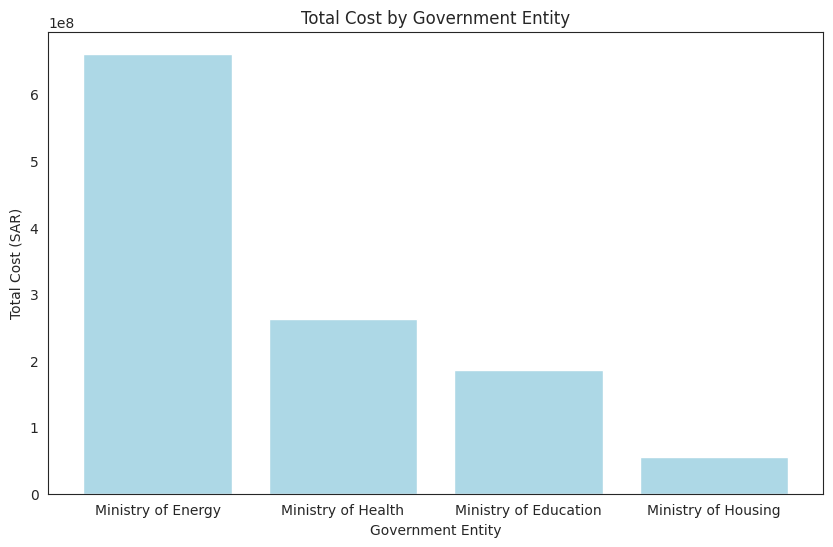

In [ ]:
## ------  1) Bar chart ------##

plt.figure(figsize=(10, 6))
plt.bar(entity_costs['Government Entity'], entity_costs['Cost'], color='lightblue')
plt.title('Total Cost by Government Entity')
plt.xlabel('Government Entity')
plt.ylabel('Total Cost (SAR)')

Text(0, 0.5, 'Expense Amount (SAR)')

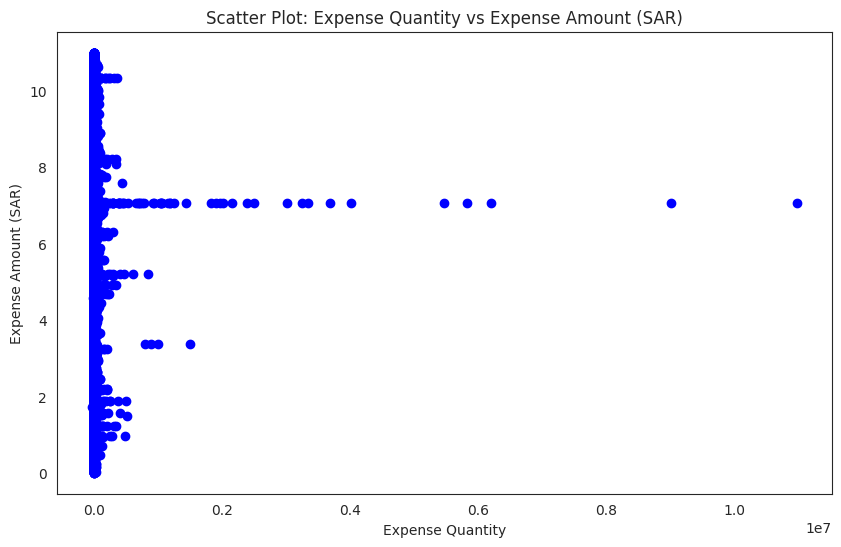

In [ ]:
## -------- 2-1) Scatter Plot ------------##

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Expense Quantity'], merged_df['Expense Amount (SAR)'], color='blue')

# Add title and labels
plt.title('Scatter Plot: Expense Quantity vs Expense Amount (SAR)')
plt.xlabel('Expense Quantity')
plt.ylabel('Expense Amount (SAR)')

In [ ]:
correlation = merged_df['Expense Quantity'].corr(merged_df['Expense Amount (SAR)'])
print('Correlation coefficient:' ,correlation)

Correlation coefficient: 0.012074901211460959




---


**The correlation ~0 , So there is No correlation**

---



Text(0, 0.5, 'Cost')

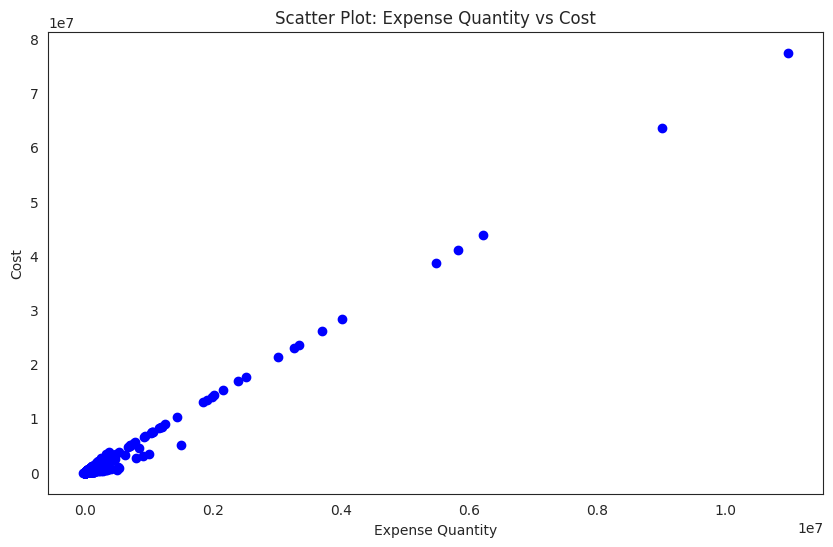

In [ ]:
## -------- 2-2) Scatter Plot ------------##

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Expense Quantity'], merged_df['Cost'], color='blue')

# Add title and labels
plt.title('Scatter Plot: Expense Quantity vs Cost')
plt.xlabel('Expense Quantity')
plt.ylabel('Cost')



---


**We can see from Plot, It's positive correlation**

---



In [ ]:
# merged_df['Expense Code'].value_counts()

In [ ]:
#Get top 10 Expense Code Amount
Expense_Code_Amount=merged_df.groupby('Expense Code').sum('Expense Amount (SAR)').sort_values(by='Expense Amount (SAR)',ascending=False).head(10)
Expense_Code_Amount

,Expense Quantity,Expense Amount (SAR),Cost
Expense Code,,,
12565,92753116.0,395.36,6.548370e+08
3915,2828418.0,288.96,2.918927e+07
5039,387540.0,254.88,4.115675e+06
2673,138732.0,225.37,1.008582e+06
361,126426.0,220.64,9.962369e+05
29,287175.0,207.69,2.593190e+06
21315,174994.0,190.89,1.590695e+06
31,10948.0,188.48,1.086042e+05
19447,38479.0,179.97,3.297650e+05


In [ ]:
top_10_codes = Expense_Code_Amount.index
filtered_merged_df = merged_df[merged_df['Expense Code'].isin(top_10_codes)]
filtered_merged_df['Year'] = filtered_merged_df['Month'].dt.year

<ipython-input-42-83a1927002d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_merged_df['Year'] = filtered_merged_df['Month'].dt.year


<Figure size 1000x600 with 0 Axes>

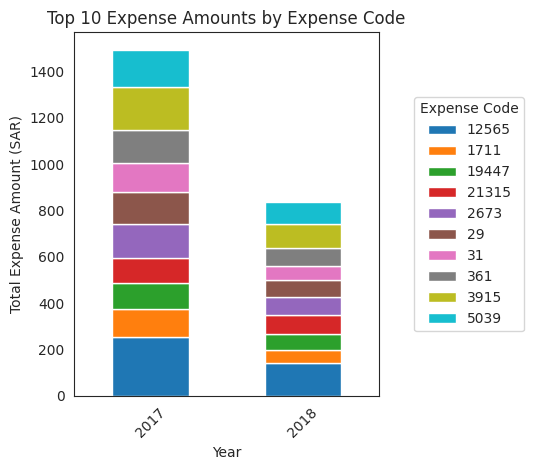

In [ ]:
## ------- 3) Stacked bar chart ------- ##

plt.figure(figsize=(10, 6))
filtered_merged_df.pivot_table(index='Year', columns='Expense Code', values='Expense Amount (SAR)', aggfunc='sum').plot(kind='bar', stacked=True)
plt.title('Top 10 Expense Amounts by Expense Code')
plt.xlabel('Year')
plt.ylabel('Total Expense Amount (SAR)')
plt.legend(title='Expense Code')
plt.legend(title='Expense Code',bbox_to_anchor=(1.5, 0.5), loc='right')
plt.xticks(rotation=45)
plt.tight_layout()



In [ ]:
Top_Entities_Amount=merged_df.groupby('Government Entity').sum('Expense Amount (SAR)').sort_values(by='Expense Amount (SAR)',ascending=False).head(5).reset_index()
Top_Entities_Amount

,Government Entity,Expense Quantity,Expense Amount (SAR),Cost
0,Ministry of Energy,1.105522e+08,38775.42,6.608713e+08
1,Ministry of Health,4.030746e+07,29122.76,2.617215e+08
2,Ministry of Education,3.062004e+07,20534.30,1.856128e+08
3,Ministry of Housing,9.412310e+06,7087.38,5.489606e+07


Text(0.5, 1.0, 'Top 5 Government Entities by Expense Amount')

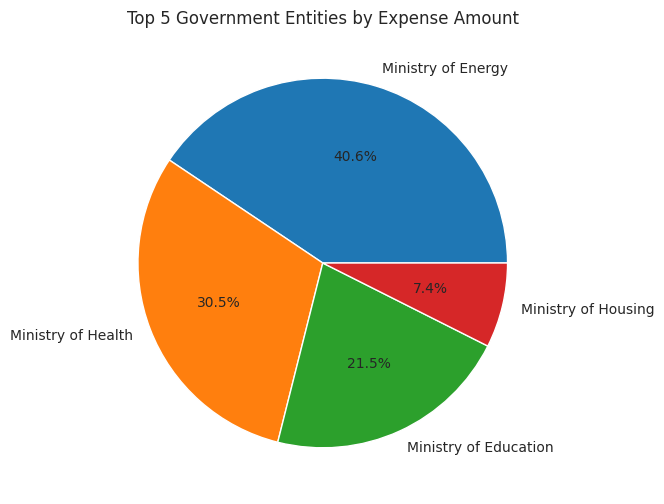

In [ ]:
## ------- 4) Pie chart -------------- ##

expense_amounts = Top_Entities_Amount['Expense Amount (SAR)']
labels = Top_Entities_Amount['Government Entity']
# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(expense_amounts, labels=labels, autopct='%1.1f%%')
plt.title('Top 5 Government Entities by Expense Amount')


# **Q6 - Machine Learning Forecasting**

Choosing the Target Y - "predict how much will be spent in terms of value by government entities"

- Y -> Expense Amount (SAR)
- X -> The rest of columns


---

# **Linear Regression**

In [ ]:
#Processing the Data
merged_df['Year'] = merged_df['Month'].dt.year
merged_df['Month_Number'] = merged_df['Month'].dt.month

In [ ]:
X = merged_df[['Expense Code','Expense Quantity','Government Entity', 'Cost','Year', 'Month_Number' ]]
y = merged_df['Expense Amount (SAR)']

# one hot code for Categorical Variables
X = pd.get_dummies(X, columns=['Expense Code', 'Government Entity'])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print('Shape of y_train:', y_train.shape)


Shape of y_train: (11959,)


In [ ]:
#Evaluate model on traning set
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
r2 = metrics.r2_score(y_train, y_pred_train)
print('r2:',r2)

MAE: 1.7166065865527356e-08
MSE: 9.248175383960753e-16
RMSE: 3.041081285326118e-08
r2: 0.9999999999999999


In [ ]:
#Evaluate model on test set
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
r2 = metrics.r2_score(y_test, y_pred_test)
print('r2:',r2)

MAE: 0.21616199583544313
MSE: 0.7258924469941221
RMSE: 0.8519932200399967
r2: 0.9160479449059178




---


**Scatter Plot: y_train vs y_pred_train**


---



Text(0, 0.5, 'y_pred_train')

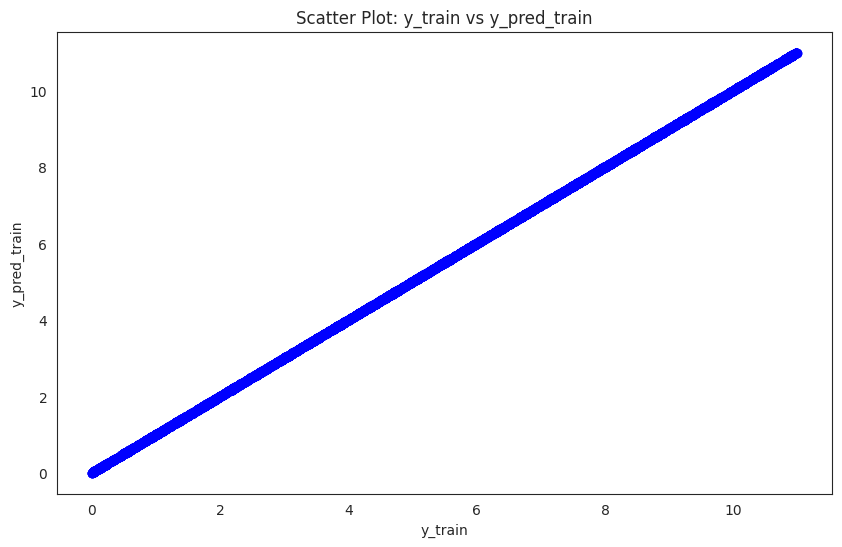

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train,color='blue')

# Add title and labels
plt.title('Scatter Plot: y_train vs y_pred_train')
plt.xlabel('y_train')
plt.ylabel('y_pred_train')



---


**Scatter Plot: y_test vs y_pred_test**


---




Text(0, 0.5, 'y_pred_test')

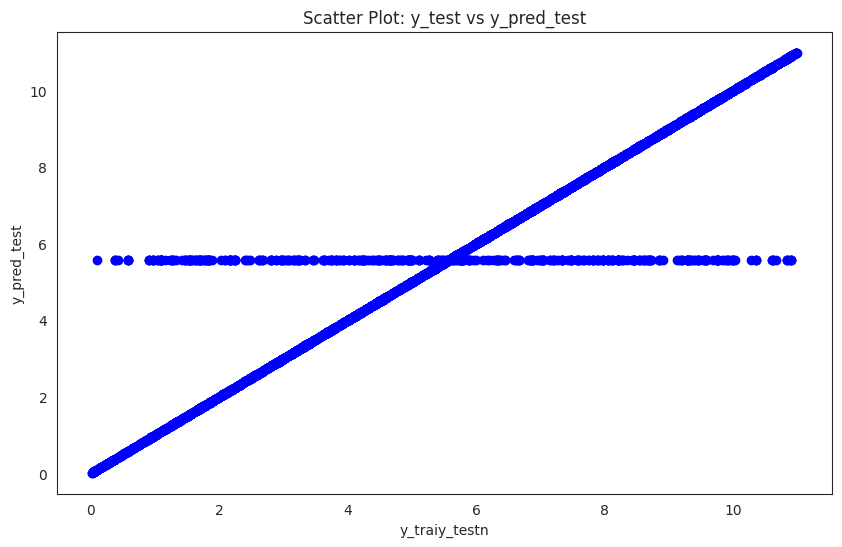

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test,color='blue')

# Add title and labels
plt.title('Scatter Plot: y_test vs y_pred_test')
plt.xlabel('y_traiy_testn')
plt.ylabel('y_pred_test')